In [1]:
import pandas as pd
import numpy as np

# Reading the data

In [4]:
bike_df = pd.read_csv("oslo_bs_june.csv.gz", parse_dates=[0, 1])

In [5]:
bike_df.head()

,started_at,ended_at,duration,start_station_id,start_station_name,start_station_description,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_description,end_station_latitude,end_station_longitude
0,2021-06-01 03:02:17.992000+00:00,2021-06-01 03:12:40.819000+00:00,622,381,Grønlands torg,ved Tøyenbekken,59.912520,10.762240,410,Landstads gate,langs Uelands gate,59.929005,10.749676
1,2021-06-01 03:14:34.332000+00:00,2021-06-01 03:20:55.647000+00:00,381,421,Alexander Kiellands Plass,langs Maridalsveien,59.928067,10.751203,609,Fred Olsens gate,ved Karl Johans gate,59.911051,10.749374
2,2021-06-01 03:20:12.604000+00:00,2021-06-01 03:28:17.572000+00:00,484,487,Carl Berners plass nord,ved Hasleveien,59.926929,10.776971,437,Sentrum Scene,ved Arbeidersamfunnets plass,59.915468,10.751141
3,2021-06-01 03:20:23.861000+00:00,2021-06-01 03:36:15.564000+00:00,951,453,Frogner Stadion,ved hovedinngangen,59.927538,10.710263,557,Akersgata,ved Grensen,59.914197,10.742883
4,2021-06-01 03:33:35.436000+00:00,2021-06-01 03:39:03.942000+00:00,328,460,Botanisk Hage sør,langs Jens Bjelkes gate,59.915418,10.769330,495,Vaterlandsparken,langs Brugata,59.913516,10.757335


In [6]:
bike_df.dtypes

started_at                   datetime64[ns, UTC]
ended_at                     datetime64[ns, UTC]
duration                                   int64
start_station_id                           int64
start_station_name                        object
start_station_description                 object
start_station_latitude                   float64
start_station_longitude                  float64
end_station_id                             int64
end_station_name                          object
end_station_description                   object
end_station_latitude                     float64
end_station_longitude                    float64
dtype: object

# Basic Statistics

In [8]:
bike_df.describe()

,duration,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude
count,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000,217255.000000
mean,778.998200,523.798140,59.922098,10.746042,522.818738,59.919305,10.744647
std,850.462225,212.211107,0.010412,0.024325,199.696630,0.009350,0.023015
min,61.000000,377.000000,59.898126,10.651118,377.000000,59.898126,10.651118
25%,388.000000,429.000000,59.913979,10.730476,437.000000,59.912147,10.730981
50%,595.000000,488.000000,59.921206,10.749929,489.000000,59.917968,10.749676
75%,901.000000,564.000000,59.928434,10.762169,559.000000,59.925265,10.760324
max,75924.000000,2309.000000,59.953411,10.814314,2309.000000,59.953411,10.814314


<AxesSubplot:ylabel='Frequency'>

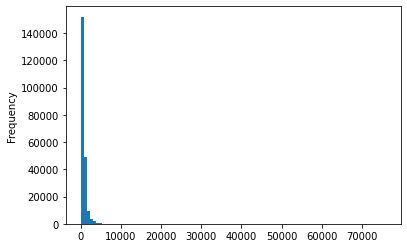

In [10]:
bike_df['duration'].plot.hist(bins=100)

# Outliers

In [11]:
mu = bike_df['duration'].mean()
sigma = bike_df['duration'].std()
z_abs = np.abs(bike_df['duration'] - mu) / sigma

<AxesSubplot:ylabel='Frequency'>

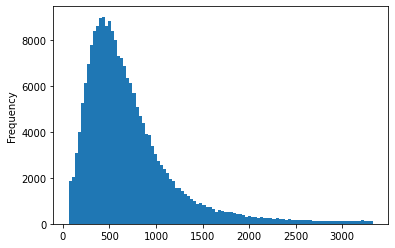

In [49]:
bike_df[z_abs < 3]['duration'].plot.hist(bins=100)

# Working with timestamps (time series)

In [18]:
bike_df['started_at']

0        2021-06-01 03:02:17.992000+00:00
1        2021-06-01 03:14:34.332000+00:00
2        2021-06-01 03:20:12.604000+00:00
3        2021-06-01 03:20:23.861000+00:00
4        2021-06-01 03:33:35.436000+00:00
                       ...               
217250   2021-06-30 22:58:19.780000+00:00
217251   2021-06-30 22:58:39.508000+00:00
217252   2021-06-30 22:58:40.818000+00:00
217253   2021-06-30 22:59:30.811000+00:00
217254   2021-06-30 23:25:32.375000+00:00
Name: started_at, Length: 217255, dtype: datetime64[ns, UTC]

In [19]:
bike_df['started_at'].dt.isocalendar()

,year,week,day
0,2021,22,2
1,2021,22,2
2,2021,22,2
3,2021,22,2
4,2021,22,2
...,...,...,...
217250,2021,26,3
217251,2021,26,3
217252,2021,26,3
217253,2021,26,3


In [20]:
bike_df['started_at'].dt.isocalendar()['day']

0         2
1         2
2         2
3         2
4         2
         ..
217250    3
217251    3
217252    3
217253    3
217254    3
Name: day, Length: 217255, dtype: UInt32

In [21]:
bike_df['started_at'].dt.isocalendar()['day'].unique()

<IntegerArray>
[2, 3, 4, 5, 6, 7, 1]
Length: 7, dtype: UInt32

In [23]:
bike_df['started_at'].dt.weekday

0         1
1         1
2         1
3         1
4         1
         ..
217250    2
217251    2
217252    2
217253    2
217254    2
Name: started_at, Length: 217255, dtype: int64

In [25]:
counts = pd.Series(1, index=bike_df['started_at'])

In [26]:
counts

started_at
2021-06-01 03:02:17.992000+00:00    1
2021-06-01 03:14:34.332000+00:00    1
2021-06-01 03:20:12.604000+00:00    1
2021-06-01 03:20:23.861000+00:00    1
2021-06-01 03:33:35.436000+00:00    1
                                   ..
2021-06-30 22:58:19.780000+00:00    1
2021-06-30 22:58:39.508000+00:00    1
2021-06-30 22:58:40.818000+00:00    1
2021-06-30 22:59:30.811000+00:00    1
2021-06-30 23:25:32.375000+00:00    1
Length: 217255, dtype: int64

In [27]:
hourly = counts.resample('1h')

In [28]:
hourly

In [29]:
hourly.mean() # not so interesting

started_at
2021-06-01 03:00:00+00:00    1.0
2021-06-01 04:00:00+00:00    1.0
2021-06-01 05:00:00+00:00    1.0
2021-06-01 06:00:00+00:00    1.0
2021-06-01 07:00:00+00:00    1.0
                            ... 
2021-06-30 19:00:00+00:00    1.0
2021-06-30 20:00:00+00:00    1.0
2021-06-30 21:00:00+00:00    1.0
2021-06-30 22:00:00+00:00    1.0
2021-06-30 23:00:00+00:00    1.0
Freq: H, Length: 717, dtype: float64

In [31]:
hc = hourly.sum()
hc

started_at
2021-06-01 03:00:00+00:00     27
2021-06-01 04:00:00+00:00    138
2021-06-01 05:00:00+00:00    498
2021-06-01 06:00:00+00:00    672
2021-06-01 07:00:00+00:00    362
                            ... 
2021-06-30 19:00:00+00:00    410
2021-06-30 20:00:00+00:00    316
2021-06-30 21:00:00+00:00    200
2021-06-30 22:00:00+00:00    120
2021-06-30 23:00:00+00:00      1
Freq: H, Length: 717, dtype: int64

In [32]:
hc.loc["2021-06-02"]

started_at
2021-06-02 00:00:00+00:00      0
2021-06-02 01:00:00+00:00      0
2021-06-02 02:00:00+00:00      0
2021-06-02 03:00:00+00:00     29
2021-06-02 04:00:00+00:00    154
2021-06-02 05:00:00+00:00    494
2021-06-02 06:00:00+00:00    647
2021-06-02 07:00:00+00:00    338
2021-06-02 08:00:00+00:00    302
2021-06-02 09:00:00+00:00    386
2021-06-02 10:00:00+00:00    357
2021-06-02 11:00:00+00:00    387
2021-06-02 12:00:00+00:00    429
2021-06-02 13:00:00+00:00    650
2021-06-02 14:00:00+00:00    872
2021-06-02 15:00:00+00:00    848
2021-06-02 16:00:00+00:00    675
2021-06-02 17:00:00+00:00    591
2021-06-02 18:00:00+00:00    467
2021-06-02 19:00:00+00:00    445
2021-06-02 20:00:00+00:00    405
2021-06-02 21:00:00+00:00    155
2021-06-02 22:00:00+00:00     62
2021-06-02 23:00:00+00:00      0
Freq: H, dtype: int64

<AxesSubplot:xlabel='started_at'>

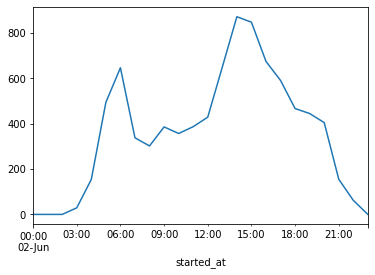

In [33]:
hc.loc["2021-06-02"].plot.line()

<AxesSubplot:xlabel='started_at'>

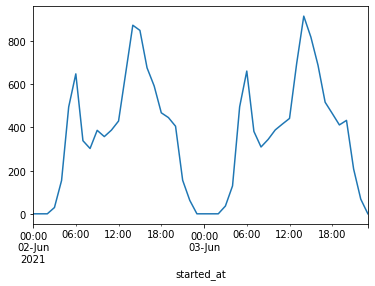

In [34]:
hc.loc["2021-06-02":"2021-06-03"].plot.line()

In [35]:
mc = counts.resample('5min').sum()

<AxesSubplot:xlabel='started_at'>

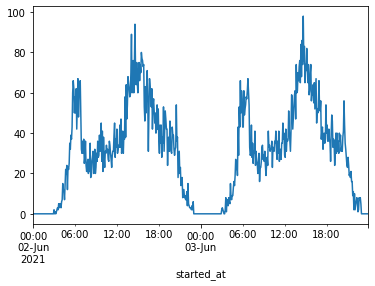

In [36]:
mc.loc["2021-06-02":"2021-06-03"].plot.line()

<AxesSubplot:xlabel='started_at'>

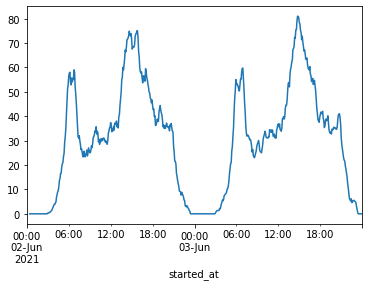

In [37]:
mc.loc["2021-06-02":"2021-06-03"].rolling(window=6).mean().plot.line()

<AxesSubplot:xlabel='started_at'>

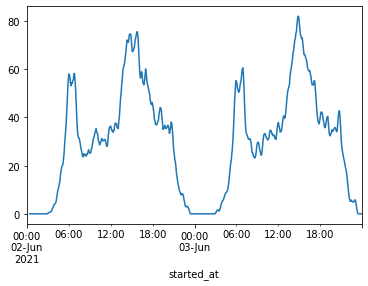

In [38]:
mc.loc["2021-06-02":"2021-06-03"].rolling(window=6, win_type="gaussian").mean(std=2).plot.line()

# Group-by

In [39]:
by_start = bike_df.groupby('start_station_name')['duration']

In [40]:
by_start.mean()

start_station_name
7 Juni Plassen                648.137856
AHO                           679.372656
Adamstuen                     685.229205
Aker Brygge                  1034.586466
Akersgata                     633.184083
                                ...     
Vulkan                        661.908549
Vålerenga                     832.292906
Vår Frelsers gravlund sør     588.779419
Økern Portal                 1141.980392
Økernveien                    727.537415
Name: duration, Length: 253, dtype: float64

In [42]:
by_start.mean().sort_values()

start_station_name
Vår Frelsers gravlund sør     588.779419
St. Hanshaugen park nord      594.034913
Ila                           602.107097
Hallings gate                 603.601423
Oslo Plaza                    609.202677
                                ...     
Jarlsborgveien               1219.220657
Skøyen Stasjon               1299.363184
Norsk Folkemuseum            1394.745958
Furulund                     1482.874372
Huk                          1792.636261
Name: duration, Length: 253, dtype: float64

In [43]:
by_start.transform('mean')

0         846.493952
1         672.149312
2         714.272182
3         867.746914
4         722.256127
             ...    
217250    781.908287
217251    670.564659
217252    672.149312
217253    764.468235
217254    609.202677
Name: duration, Length: 217255, dtype: float64

In [44]:
mu_g = by_start.transform('mean')
sigma_g = by_start.transform('std')

In [45]:
group_z_abs = np.abs(bike_df['duration'] - mu_g) / sigma_g

<AxesSubplot:ylabel='Frequency'>

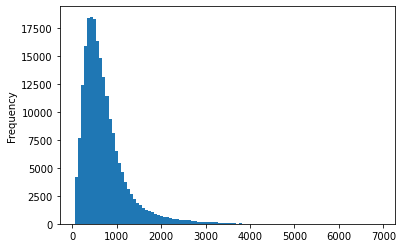

In [48]:
bike_df[group_z_abs < 3]['duration'].plot.hist(bins=100)

In [50]:
bike_df['started_at'].dt.day_name()

0           Tuesday
1           Tuesday
2           Tuesday
3           Tuesday
4           Tuesday
            ...    
217250    Wednesday
217251    Wednesday
217252    Wednesday
217253    Wednesday
217254    Wednesday
Name: started_at, Length: 217255, dtype: object

In [51]:
bike_df.groupby(bike_df['started_at'].dt.day_name()).size()

started_at
Friday       31975
Monday       24914
Saturday     25782
Sunday       17357
Thursday     33368
Tuesday      40864
Wednesday    42995
dtype: int64

<AxesSubplot:xlabel='started_at'>

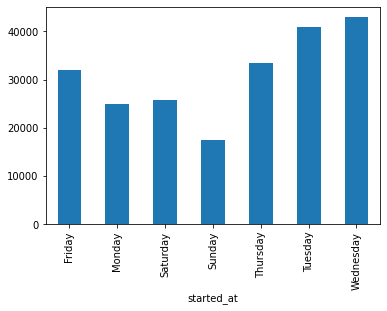

In [53]:
bike_df.groupby(bike_df['started_at'].dt.day_name()).size().plot.bar()

In [55]:
by_day_week = bike_df.groupby([bike_df['started_at'].dt.day_name(),
                 bike_df['started_at'].dt.isocalendar().week]).size()

In [57]:
by_day_week.unstack().T

started_at,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
week,,,,,,,
22,8788.0,NaN,7475.0,5120.0,8808.0,8593.0,8693.0
23,7613.0,7017.0,6940.0,5338.0,8498.0,8337.0,8844.0
24,7770.0,5420.0,5282.0,3023.0,7702.0,9068.0,8190.0
25,7804.0,5128.0,6085.0,3876.0,8360.0,7167.0,9235.0
26,NaN,7349.0,NaN,NaN,NaN,7699.0,8033.0
